In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"/workspaces/codespaces-jupyter/notebooks/flight price pred/Data_Train.xlsx")

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
print(df['Route'].value_counts())

print(df['Total_Stops'].value_counts())

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


In [7]:
#filling NaN values with mode

df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)
df['Route'].fillna(df['Route'].mode()[0],inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
# indexing journey day and month seperately from date

df['Journey_day']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day

df['Journey_month']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month

df.drop("Date_of_Journey",axis=1,inplace=True)



In [10]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [11]:
#similarly getting hours and minutes indexed from dep time 

df['dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

df['dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

df.drop("Dep_Time",axis=1,inplace=True)

df.head()


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [12]:
#similarly getting hours and minutes indexed from arr time

df['arr_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

df['arr_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop("Arrival_Time",axis=1,inplace=True)

df.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [13]:
#there was a wrong data with duration 5 mins, so dropped that

df[df['Duration']=='5m'].index[0]

df.drop(df[df['Duration']=='5m'].index[0],axis=0,inplace=True)

In [14]:
# now we are going to convert the duration into minutes
# now it is having hours and minutes


get_hour = df['Duration'].str.split().str[0].str.split('h').str[0].astype(int)*60
get_min=df['Duration'].str.split().str[1].str.split('m').str[0]
get_min = pd.Series(np.where(get_min.isnull(),get_min, get_min.astype(float)))

df['duration_in_minutes'] = get_hour + np.where(get_min.isnull(), 0, get_min)

df['duration_in_minutes']= df['duration_in_minutes'].astype(int)

In [15]:
# now dropping the duration column

df.drop("Duration",axis=1,inplace=True)

df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,160


In [16]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [17]:
# total stops are categorical so applying encoding for that,label encoding

# val={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

df['Total_Stops'] =df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,1,3,11,30,14,10,160


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  int64 
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   Journey_day          10682 non-null  int64 
 8   Journey_month        10682 non-null  int64 
 9   dep_hour             10682 non-null  int64 
 10  dep_min              10682 non-null  int64 
 11  arr_hour             10682 non-null  int64 
 12  arr_min              10682 non-null  int64 
 13  duration_in_minutes  10682 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.2+ MB


In [19]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [20]:
#encoding for source, label encoding
df['Source']=df['Source'].map({'Banglore':0, 'Kolkata':1, 'Delhi':2, 'Chennai':3, 'Mumbai':4})
df


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,IndiGo,0,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,1,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,2,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,1,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,0,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,1,Banglore,CCU → BLR,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,1,Banglore,CCU → BLR,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,0,Delhi,BLR → DEL,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,0,New Delhi,BLR → DEL,0,No info,12648,1,3,11,30,14,10,160


In [21]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [22]:
# there was two categorical value for the same place as Delhi and New Delhi

# df[df['Destination']=='New Delhi']

df['Destination'] = np.where(df['Destination']=='New Delhi','Delhi',df['Destination'])

In [23]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [24]:
#encoding for destination, label encoding

df['Destination']=df['Destination'].map({'Banglore':0, 'Cochin':3, 'Kolkata':1, 'Delhi':2, 'Hyderabad':4})

In [25]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,IndiGo,0,2,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,1,0,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,2,3,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,1,0,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,0,2,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,1,0,CCU → BLR,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,1,0,CCU → BLR,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,0,2,BLR → DEL,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,0,2,BLR → DEL,0,No info,12648,1,3,11,30,14,10,160


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  int64 
 2   Destination          10682 non-null  int64 
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  int64 
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   Journey_day          10682 non-null  int64 
 8   Journey_month        10682 non-null  int64 
 9   dep_hour             10682 non-null  int64 
 10  dep_min              10682 non-null  int64 
 11  arr_hour             10682 non-null  int64 
 12  arr_min              10682 non-null  int64 
 13  duration_in_minutes  10682 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.2+ MB


In [27]:
#as we have no of stops route is not needed and it is a object value, no use at all so dropping it

df.drop('Route', axis=1, inplace=True)

df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,IndiGo,0,2,0,No info,3897,24,3,22,20,1,10,170
1,Air India,1,0,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,2,3,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,1,0,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,0,2,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,1,0,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,1,0,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,0,2,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,0,2,0,No info,12648,1,3,11,30,14,10,160


In [28]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [29]:
# same we are doing label encoding for Airline using sklearn

#we can also do one hot encoding for Airline as it is a nominal value

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Airline'] = label_encoder.fit_transform(df['Airline'])

#like this we can also do this process for source, destination and no of stops too. it is from sklearn

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  int64 
 1   Source               10682 non-null  int64 
 2   Destination          10682 non-null  int64 
 3   Total_Stops          10682 non-null  int64 
 4   Additional_Info      10682 non-null  object
 5   Price                10682 non-null  int64 
 6   Journey_day          10682 non-null  int64 
 7   Journey_month        10682 non-null  int64 
 8   dep_hour             10682 non-null  int64 
 9   dep_min              10682 non-null  int64 
 10  arr_hour             10682 non-null  int64 
 11  arr_min              10682 non-null  int64 
 12  duration_in_minutes  10682 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


In [31]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,3,0,2,0,No info,3897,24,3,22,20,1,10,170
1,1,1,0,2,No info,7662,1,5,5,50,13,15,445
2,4,2,3,2,No info,13882,9,6,9,25,4,25,1140
3,3,1,0,1,No info,6218,12,5,18,5,23,30,325
4,3,0,2,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,1,0,0,No info,4107,9,4,19,55,22,25,150
10679,1,1,0,0,No info,4145,27,4,20,45,23,20,155
10680,4,0,2,0,No info,7229,27,4,8,20,11,20,180
10681,10,0,2,0,No info,12648,1,3,11,30,14,10,160


In [32]:
df.drop('Additional_Info', axis=1, inplace=True)

df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,3,0,2,0,3897,24,3,22,20,1,10,170
1,1,1,0,2,7662,1,5,5,50,13,15,445
2,4,2,3,2,13882,9,6,9,25,4,25,1140
3,3,1,0,1,6218,12,5,18,5,23,30,325
4,3,0,2,1,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,1,0,0,4107,9,4,19,55,22,25,150
10679,1,1,0,0,4145,27,4,20,45,23,20,155
10680,4,0,2,0,7229,27,4,8,20,11,20,180
10681,10,0,2,0,12648,1,3,11,30,14,10,160


In [33]:
df.shape

(10682, 12)

# test data

In [34]:
test_df = pd.read_excel(r"/workspaces/codespaces-jupyter/notebooks/flight price pred/Test_set.xlsx")

test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [35]:
# encoding journey day and month
test_df['Journey_day']=pd.to_datetime(test_df['Date_of_Journey'],format="%d/%m/%Y").dt.day

test_df['Journey_month']=pd.to_datetime(test_df['Date_of_Journey'],format="%d/%m/%Y").dt.month

test_df.drop("Date_of_Journey",axis=1,inplace=True)

# encoding dep time

test_df['dep_hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour

test_df['dep_min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

test_df.drop("Dep_Time",axis=1,inplace=True)

# encoding arr time

test_df['arr_hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour

test_df['arr_min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute

test_df.drop("Arrival_Time",axis=1,inplace=True)

test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [36]:
# # now we are going to convert the duration into minutes
# # now it is having hours and minutes

# #there was a wrong data with duration 5 mins, so dropped that

test_df[test_df['Duration']=='5m'].index[0]

test_df.drop(test_df[test_df['Duration']=='5m'].index[0],axis=0,inplace=True)

get_hour = test_df['Duration'].str.split().str[0].str.split('h').str[0].astype(int)*60
get_min=test_df['Duration'].str.split().str[1].str.split('m').str[0]
get_min = pd.Series(np.where(get_min.isnull(),get_min, get_min.astype(float)))

test_df['duration_in_minutes'] = get_hour + np.where(get_min.isnull(), 0, get_min)

test_df['duration_in_minutes']= test_df['duration_in_minutes'].astype(int)


# now dropping the duration column

test_df.drop("Duration",axis=1,inplace=True)

test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,1435
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,14,20,16,55,155
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,21,50,4,25,395
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,4,0,19,15,915


In [37]:
test_df['Total_Stops'] =test_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [38]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

test_df['Airline']=le.fit_transform(test_df['Airline'])
test_df['Source']=le.fit_transform(test_df['Source'])
test_df['Destination']=le.fit_transform(test_df['Destination'])
test_df['Additional_Info']=le.fit_transform(test_df['Additional_Info'])

In [39]:
test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,4,2,1,DEL → BOM → COK,1,5,6,6,17,30,4,25,655
1,3,3,0,CCU → MAA → BLR,1,5,12,5,6,20,10,20,240
2,4,2,1,DEL → BOM → COK,1,3,21,5,19,15,19,0,1425
3,6,2,1,DEL → BOM → COK,1,5,21,5,8,0,21,0,780
4,0,0,2,BLR → DEL,0,5,24,6,23,55,2,45,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,CCU → DEL → BLR,1,5,6,6,20,30,20,25,1435
2667,3,3,0,CCU → BLR,0,5,27,3,14,20,16,55,155
2668,4,2,1,DEL → BOM → COK,1,5,6,3,21,50,4,25,395
2669,1,2,1,DEL → BOM → COK,1,5,6,3,4,0,19,15,915


In [40]:
# now dropping the duration column

test_df.drop("Route",axis=1,inplace=True)

test_df.drop("Additional_Info",axis=1,inplace=True)

test_df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,4,2,1,1,6,6,17,30,4,25,655
1,3,3,0,1,12,5,6,20,10,20,240
2,4,2,1,1,21,5,19,15,19,0,1425
3,6,2,1,1,21,5,8,0,21,0,780
4,0,0,2,0,24,6,23,55,2,45,170
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,6,6,20,30,20,25,1435
2667,3,3,0,0,27,3,14,20,16,55,155
2668,4,2,1,1,6,3,21,50,4,25,395
2669,1,2,1,1,6,3,4,0,19,15,915


In [41]:
print(df.shape)
print(test_df.shape)

(10682, 12)
(2670, 11)


# Feature selection


In [42]:
Y = df['Price']
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [43]:
X = df.drop('Price', axis=1)

X.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_in_minutes
0,3,0,2,0,24,3,22,20,1,10,170
1,1,1,0,2,1,5,5,50,13,15,445
2,4,2,3,2,9,6,9,25,4,25,1140
3,3,1,0,1,12,5,18,5,23,30,325
4,3,0,2,1,1,3,16,50,21,35,285


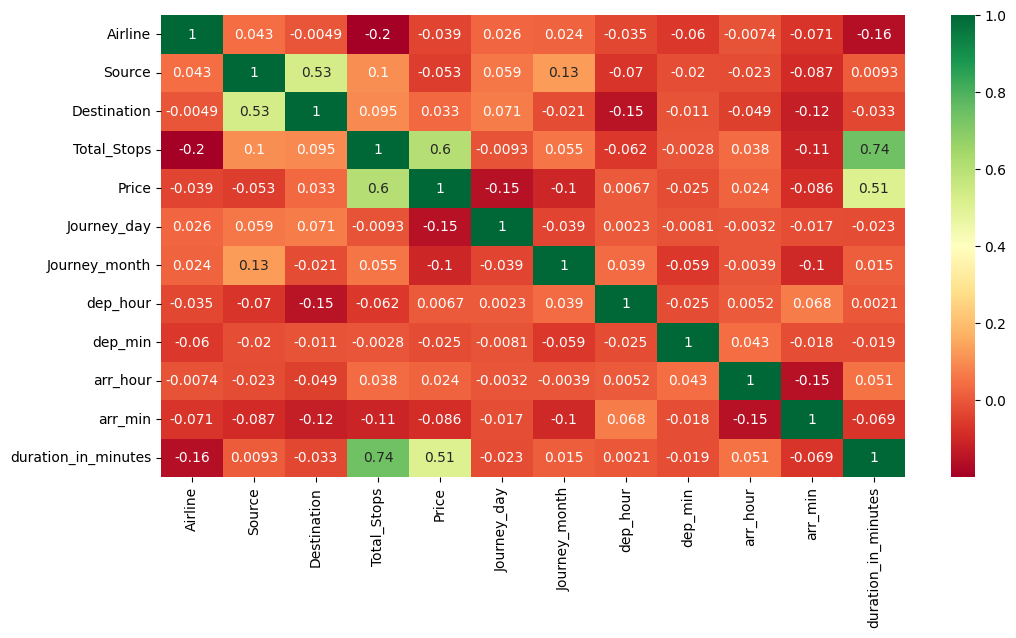

In [44]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot= True, cmap=("RdYlGn"))

plt.show()

In [45]:
# finding important features using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()

etr.fit(X,Y)

ExtraTreesRegressor()

In [46]:
etr.feature_importances_

array([0.14430531, 0.03379052, 0.02179368, 0.26129944, 0.14662433,
       0.06977599, 0.0308593 , 0.03192893, 0.03692301, 0.02738621,
       0.19531327])

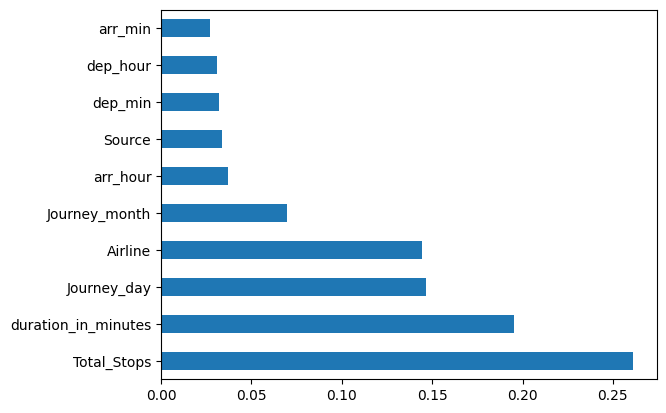

In [47]:
# plotting the important features in order

imp_features = pd.Series(etr.feature_importances_, index=X.columns)
imp_features.nlargest(10).plot(kind='barh')
plt.show()

# Running model

In [48]:
# doing train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
y_pred=rf_reg.predict(X_test)

In [51]:
rf_reg.score(X_train,y_train)

0.953567598853709

In [52]:
rf_reg.score(X_test,y_test)

0.811690272065696

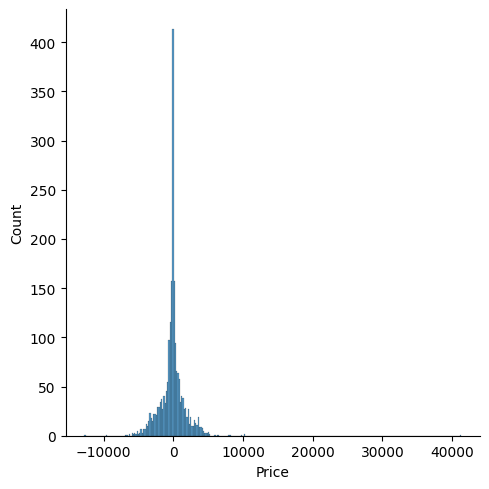

In [53]:
sns.displot(y_test - y_pred,)

plt.show()

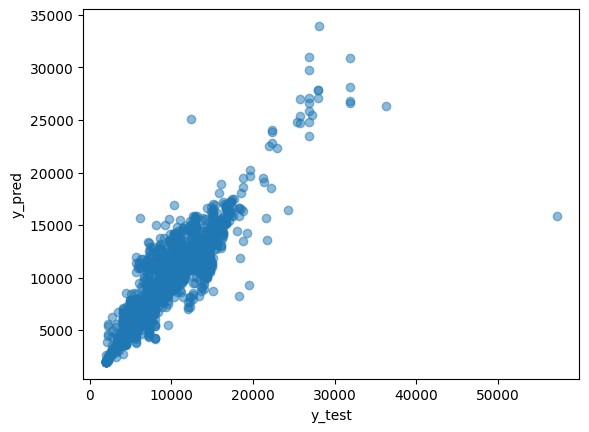

In [54]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Model evaluation

In [55]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score: ",metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  1169.783840307109
Mean Squared Error:  3980683.4692568113
Root Mean Squared Error:  1995.1650230637092
R2 score:  0.811690272065696


In [56]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(Y)-min(Y))

0.02566029636237456

# Hyper parameter tuning

In [57]:
#initialising different values for the hyper parameters
import numpy as np

#number of trees in random forest
n_estimators = [ int(i) for i in np.linspace(start=10, stop=1200, num=12)]

#number of features to consider at evey split
max_features = ['auto','sqrt']

#max number of levels of trees
max_depth = [int(i) for i in np.linspace(start = 5, stop = 100, num = 100) ]

#min number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#min number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf
               }

In [58]:
# we are going to do random forest regressor here
# for decision trees based algorithm we do not need to scale the values

from sklearn.model_selection import RandomizedSearchCV

# Here we are using RandomizedSearchCV as this is the fast one
# or we can also use GridSearchCV
#here we can do many hyperparameter tuning

In [59]:
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [60]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=334; total time=   1.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=334; total time=   1.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=334; total time=   1.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=334; total time=   1.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=334; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=875; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=875; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=8

/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=80, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1091; total time=   8.7s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=80, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1091; total time=   8.7s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=80, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1091; total time=   8.7s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=80, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1091; total time=   8.7s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=80, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1091; total time=   8.7s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=875; total time=  10.7s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=875; total time=  10.7s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=875; total time=  10.7s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=875; total time=  10.8s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=875; total time=  10.8s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=442; total time=   3.3s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=442; total time=   3.2s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=442; total time=   3.3s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=442; total time=   3.3s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=442; total time=   3.2s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=118; total time=   1.5s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=118; total time=   1.5s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=118; total time=   1.5s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=118; total time=   1.5s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=118; total time=   1.5s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=226; total time=   1.9s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=226; total time=   1.9s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=226; total time=   1.9s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=226; total time=   1.9s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=226; total time=   2.0s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=659; total time=   5.2s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=659; total time=   5.2s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=659; total time=   5.3s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=659; total time=   5.3s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=659; total time=   5.3s
[CV] END max_depth=48, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=226; total time=   1.1s
[CV] END max_depth=48, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=226; total time=   1.1s
[CV] END max_depth=48, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=226; total time=   1.1s
[CV] END max_depth=48, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=226; total time=   1.2s
[CV] END max_depth=48, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=226; total time=   1.1s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=99, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=767; total time=   8.9s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=99, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=767; total time=   8.8s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=99, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=767; total time=   8.8s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=99, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=767; total time=   8.8s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=99, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=767; total time=   8.9s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 14, 15, 16, 17,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 28,
                                                      29, 30, 31, 32, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 118, 226, 334, 442,
                                                         550, 659, 767, 875,
                                                         983, 1091, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 118,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 17}

In [62]:
rf_random_pred=rf_random.predict(X_test)

<Figure size 1000x1000 with 0 Axes>

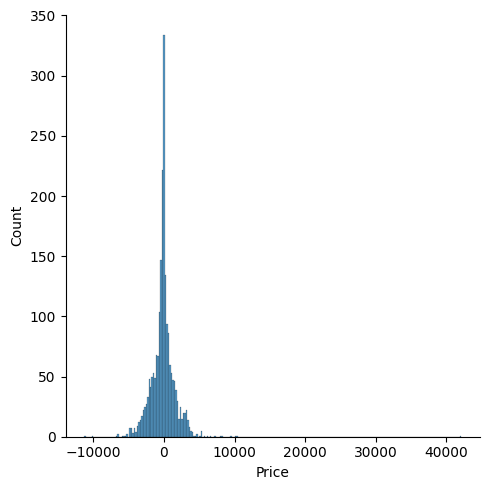

In [63]:
plt.figure(figsize= (10,10))

sns.displot(y_test - rf_random_pred)

plt.show()

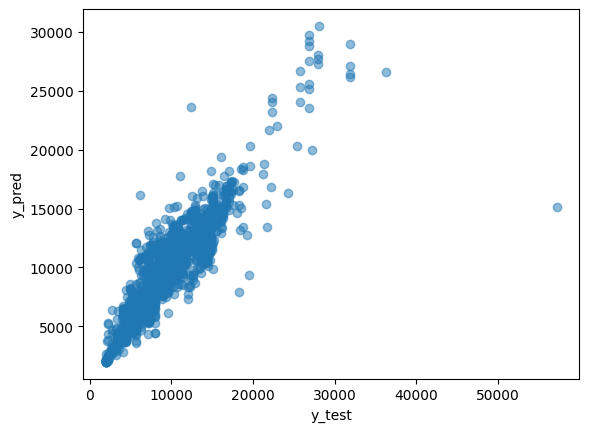

In [64]:
plt.scatter(y_test, rf_random_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [65]:
#Before hyperparameter tuning
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score: ",metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  1169.783840307109
Mean Squared Error:  3980683.4692568113
Root Mean Squared Error:  1995.1650230637092
R2 score:  0.811690272065696


In [66]:
# After hyperparameter tuning

from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,rf_random_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, rf_random_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, rf_random_pred)))
print("R2 score: ",metrics.r2_score(y_test, rf_random_pred))

# we have a few better performance in the scores here

Mean Absolute Error:  1129.3990138920492
Mean Squared Error:  3603965.169963518
Root Mean Squared Error:  1898.4112225657323
R2 score:  0.8295112621031274


# model packaging

In [67]:
# open a file and save our model
# we are doing his using pickle

import pickle
file = open(r'flight_rf_reg_model.pkl', 'wb')

# dump the info to that file
pickle.dump(rf_reg, file)